In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
sys.path.append("../src")
from src.utils.plotting import plot_all_barplots
from src.utils.plotting import plot_probability
from src.examples.example_setup import setup_DynamicIVCD
from ccb import CCB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reward distro across time

In [12]:
reward = [0.493, 0.5070000000000001, 0.773, 0.22700000000000004]
reward1 = [0.5490000000000003, 0.5546000000000002, 0.6610000000000003, 0.5518000000000002]
reward2 = [0.5863333333333336, 0.5894444444444447, 0.6485555555555558, 0.5878888888888891]
rewards = [reward, reward1, reward2]
rewards

[[0.493, 0.5070000000000001, 0.773, 0.22700000000000004],
 [0.5490000000000003,
  0.5546000000000002,
  0.6610000000000003,
  0.5518000000000002],
 [0.5863333333333336,
  0.5894444444444447,
  0.6485555555555558,
  0.5878888888888891]]

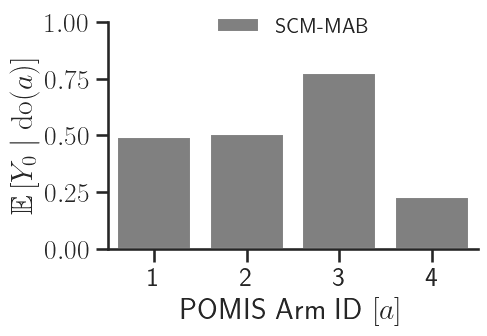

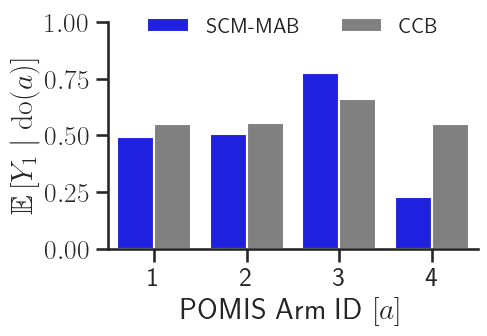

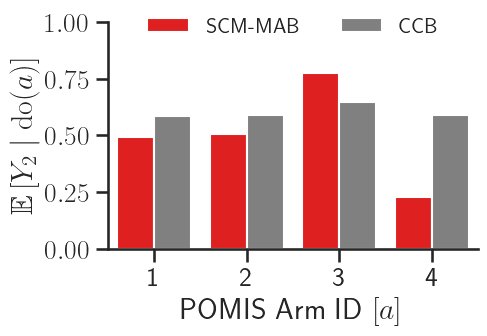

In [13]:
plot_all_barplots(rewards, False)

# Optimal arm selection probability

In [14]:
params = setup_DynamicIVCD(5)
params['horizon'] = 10000
# params['bandit_algorithm'] = 'UCB'
m = CCB(**params)
m.run()

Time index:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Batch computation too fast (0.1435229778289795s.) Setting batch_size=2.
[Parallel(n_jobs=7)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done   3 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done  14 tasks  

Time index:  20%|██        | 1/5 [00:02<00:09,  2.36s/it]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Batch computation too fast (0.12806987762451172s.) Setting batch_size=2.
[Parallel(n_jobs=7)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  14 tasks 

Time index:  40%|████      | 2/5 [00:04<00:06,  2.24s/it]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Batch computation too fast (0.12096405029296875s.) Setting batch_size=2.
[Parallel(n_jobs=7)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  14 tasks 

Time index:  60%|██████    | 3/5 [00:06<00:04,  2.19s/it]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Batch computation too fast (0.12122106552124023s.) Setting batch_size=2.
[Parallel(n_jobs=7)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  14 tasks 

Time index:  80%|████████  | 4/5 [00:08<00:02,  2.16s/it]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Batch computation too fast (0.1259291172027588s.) Setting batch_size=2.
[Parallel(n_jobs=7)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done  14 tasks  

Time index: 100%|██████████| 5/5 [00:10<00:00,  2.17s/it]


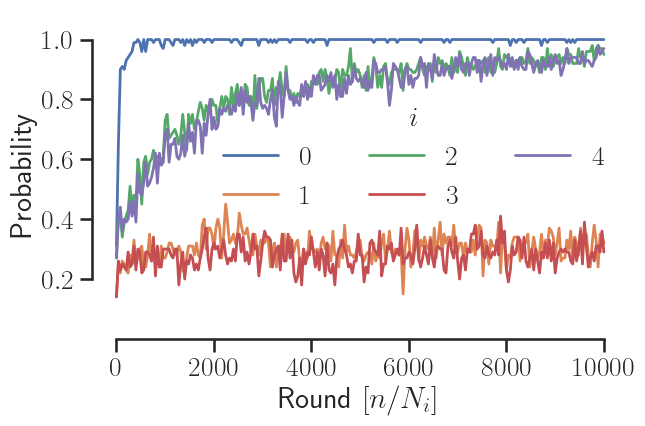

In [15]:
plot_probability(m, 0, 5, 10000, 250, None)

# Cumulative regret

In [16]:
import multiprocessing
from src.scm_mab.NIPS2018POMIS_exp.test_bandit_strategies import compute_cumulative_regret
from src.scm_mab.utils import with_default
from src.scm_mab.viz_util import sparse_index
from src.examples.SEMs import testSEM
from src.scm_mab.model import StructuralCausalModel
from src.utils.experiments import main_experiment_ccb
from src.utils.plotting import plot_CR
import numpy as np

In [17]:
temporal_index = 1
target = 'Y_1'
# Check that indices line up for this time-slice
target_var_only, target_var_temporal_index = target.split("_")
assert int(target_var_temporal_index) == temporal_index
params = setup_DynamicIVCD(5)
m = CCB(**params)

# SEM
SEM = testSEM()

# Create SCM
scm = StructuralCausalModel(
    G=m.causal_diagrams[temporal_index],
    F=SEM,
    P_U=m.P_U,
    D=m.domains,
    more_U=m.more_U,
)

#  Convert time-slice SCM to bandit machine
past_interventions = [{"Z":0}]
num_simulation_repeats = 100
horizon=5000
results, mu = main_experiment_ccb(
    M=scm, Y=target_var_only, past_interventions=past_interventions, num_trial = num_simulation_repeats, horizon=horizon, n_jobs=3 * multiprocessing.cpu_count() // 2
)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Batch computation too fast (0.07456827163696289s.) Setting batch_size=2.
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]

In [18]:
num_simulation_repeats = 100
horizon=5000
results_scmmab, mu_scmmab = main_experiment_ccb(
    scm, target_var_only, None, num_simulation_repeats, horizon, n_jobs=3 * multiprocessing.cpu_count() // 2
)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Batch computation too fast (0.0936579704284668s.) Setting batch_size=2.
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done  13 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]:

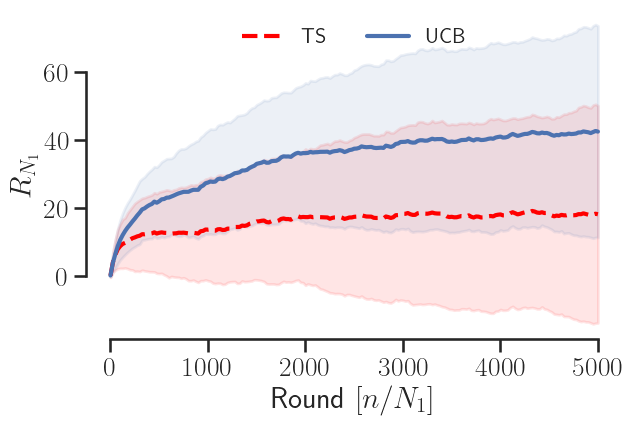

In [19]:
mu_star = max(mu_scmmab)
out_scmmab = {'TS':None, 'UCB':None}
for pi in ['TS', 'UCB']:
    value_matrix = compute_cumulative_regret(results_scmmab[('POMIS', pi)][1], mu_star, remove_negative_cr=False)

    mean_x = np.mean(value_matrix, axis=0)
    sd_x = np.std(value_matrix, axis=0)
    lower, upper = mean_x - sd_x, mean_x + sd_x
    cut_time = 5000
    time_points = sparse_index(with_default(cut_time, len(mean_x)), 200)
    out_scmmab[pi] = [time_points, mean_x, lower, upper]

plot_CR(out_scmmab, None)

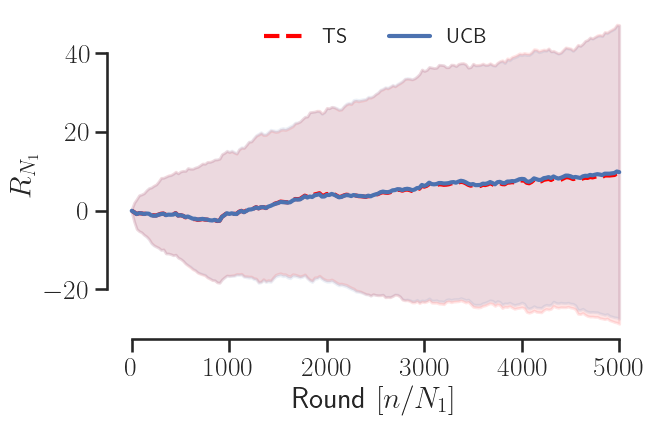

In [20]:
mu_star = max(mu)
out = {'TS':None, 'UCB':None}
for pi in ['TS', 'UCB']:
    value_matrix = compute_cumulative_regret(results[('POMIS', pi)][1], mu_star, remove_negative_cr=False)

    mean_x = np.mean(value_matrix, axis=0)
    sd_x = np.std(value_matrix, axis=0)
    lower, upper = mean_x - sd_x, mean_x + sd_x
    cut_time = 5000
    time_points = sparse_index(with_default(cut_time, len(mean_x)), 200)
    out[pi] = [time_points, mean_x, lower, upper]

plot_CR(out, None)